# Solutions to group work: Departures from the SIR model (Exercise 2)

## Coding the models

In [1]:
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# Population size:
N <- 1000

### Model 1: SEIR model

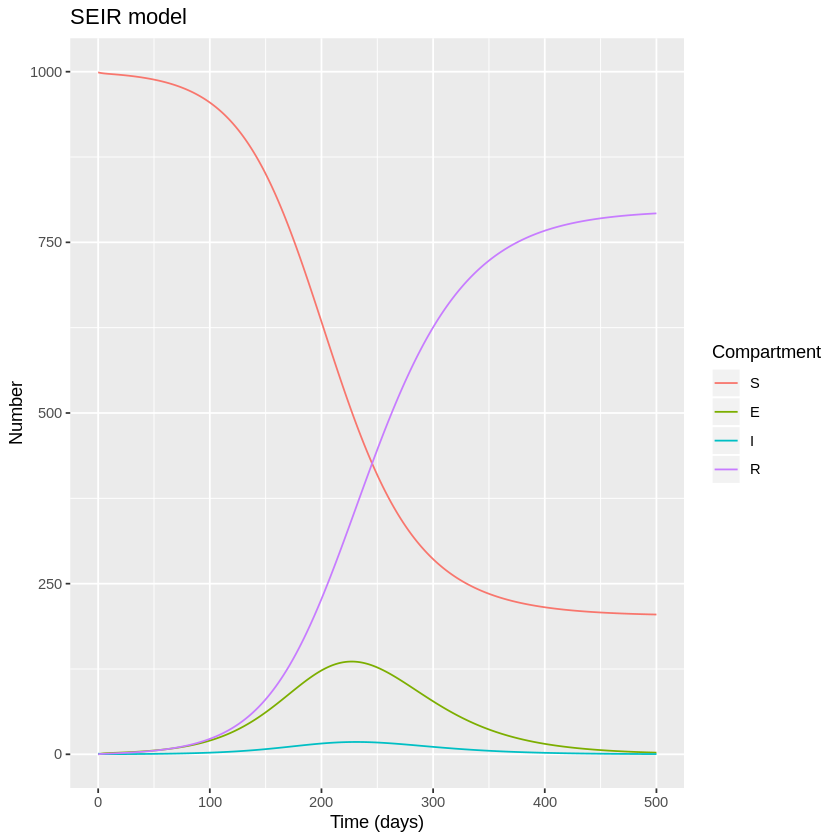

In [2]:
# MODEL INPUTS:

# Initial conditions
seir_initial_state_values <- c(S = N-1,
                               E = 0,
                               I = 1,           
                               R = 0)           

# Parameter values per day
seir_parameters <- c(beta = 0.5, 
                     r = 1/30,
                     gamma = 1/4)

# TIMESTEPS:

# Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 500, by = 1)   # from 0 to 500 days in daily intervals

# SIR MODEL FUNCTION: 

# The model function takes as input arguments (in the following order): time, state and parameters
seir_model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {     
        
    # Calculating the total population size N (the sum of the number of people in each compartment)
      N <- S+E+I+R
      
    # Defining lambda:
      lambda <- beta * I/N
        
    # The differential equations
      dS <- -lambda * S     
      dE <- lambda * S - r * E
      dI <- r * E - gamma * I                                        
      dR <- gamma * I                 
      
    return(list(c(dS, dE, dI, dR))) 
    })
  
}

# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output1 <- as.data.frame(ode(y = seir_initial_state_values, 
                            times = times, 
                            func = seir_model,
                            parms = seir_parameters))

output1_long <- melt(as.data.frame(output1), id = "time")                  # turn output dataset into long format

# Plot the proportion of people in the S, I and R compartments over time
ggplot(data = output1_long,                                               # specify object containing data to plot
       aes(x = time, y = value, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Number") +                                                       # add label for y axis
  labs(colour = "Compartment",                                           # add legend title  
       title = "SEIR model")                                    

In [3]:
print("Peak prevalence of the epidemic:")
max(output1$I)
print("Timing of the peak (days):")
output1$time[output1$I==max(output1$I)]
print("Duration of the epidemic (days):")
max(output1$time[output1$I>1])-min(output1$time[output1$I>1])

[1] "Peak prevalence of the epidemic:"


[1] 18.07904

[1] "Timing of the peak (days):"


[1] 231

[1] "Duration of the epidemic (days):"


[1] 377

### Model 2: SAIR model (1)

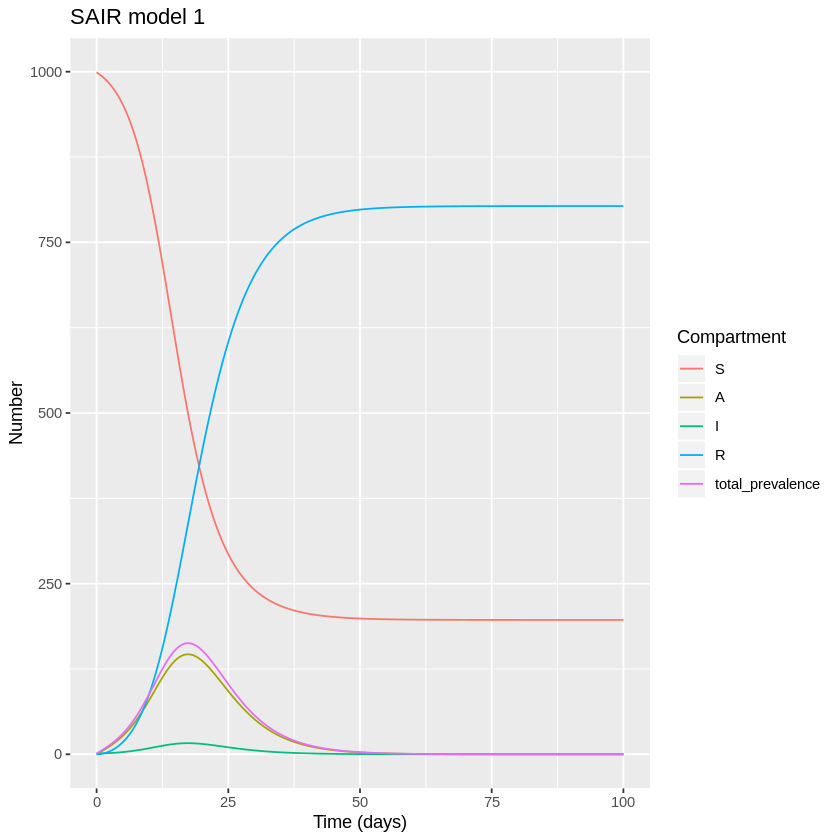

In [4]:
# MODEL INPUTS:

# Initial conditions
sair1_initial_state_values <- c(S = N-1,
                                A = 0,
                                I = 1,           
                                R = 0)           

# Parameter values per day
sair1_parameters <- c(beta = 5, 
                      p = 0.1,
                      gamma = 1/4)

# TIMESTEPS:

# Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 100, by = 0.1)   # from 0 to 100 days in intervals of 0.1 days

# SIR MODEL FUNCTION: 

# The model function takes as input arguments (in the following order): time, state and parameters
sair1_model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {    
        
    # Calculating the total population size N (the sum of the number of people in each compartment)
      N <- S+A+I+R
      
    # Defining lambda:
      lambda <- beta * I/N
        
    # The differential equations
      dS <- -lambda * S     
      dA <- (1-p) * lambda * S - gamma * A
      dI <- p * lambda * S - gamma * I                                        
      dR <- gamma * A + gamma * I                 
      
    return(list(c(dS, dA, dI, dR))) 
    })
  
}

# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output2 <- as.data.frame(ode(y = sair1_initial_state_values, 
                            times = times, 
                            func = sair1_model,
                            parms = sair1_parameters))

# Add a column for total number of infected individuals
output2$total_prevalence <- output2$I+output2$A  # infected individuals = symptomatic + asymptomatic

output2_long <- melt(as.data.frame(output2), id = "time")                  # turn output dataset into long format

# Plot the proportion of people in the S, I and R compartments over time
ggplot(data = output2_long,                                               # specify object containing data to plot
       aes(x = time, y = value, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Number") +                                                       # add label for y axis
  labs(colour = "Compartment",                                           # add legend title  
       title = "SAIR model 1")    

In [5]:
print("Peak prevalence of the epidemic:")
max(output2$total_prevalence) 
print("Peak symptomatic prevalence:")
max(output2$I)
print("Timing of the peak (days):")
output2$time[output2$total_prevalence==max(output2$total_prevalence)]
print("Duration of the epidemic (days):")
max(output2$time[output2$total_prevalence>1])-min(output2$time[output2$total_prevalence>1])

[1] "Peak prevalence of the epidemic:"


[1] 162.8059

[1] "Peak symptomatic prevalence:"


[1] 16.2923

[1] "Timing of the peak (days):"


[1] 17.4

[1] "Duration of the epidemic (days):"


[1] 57.4

### Model 3: SAIR model (2)

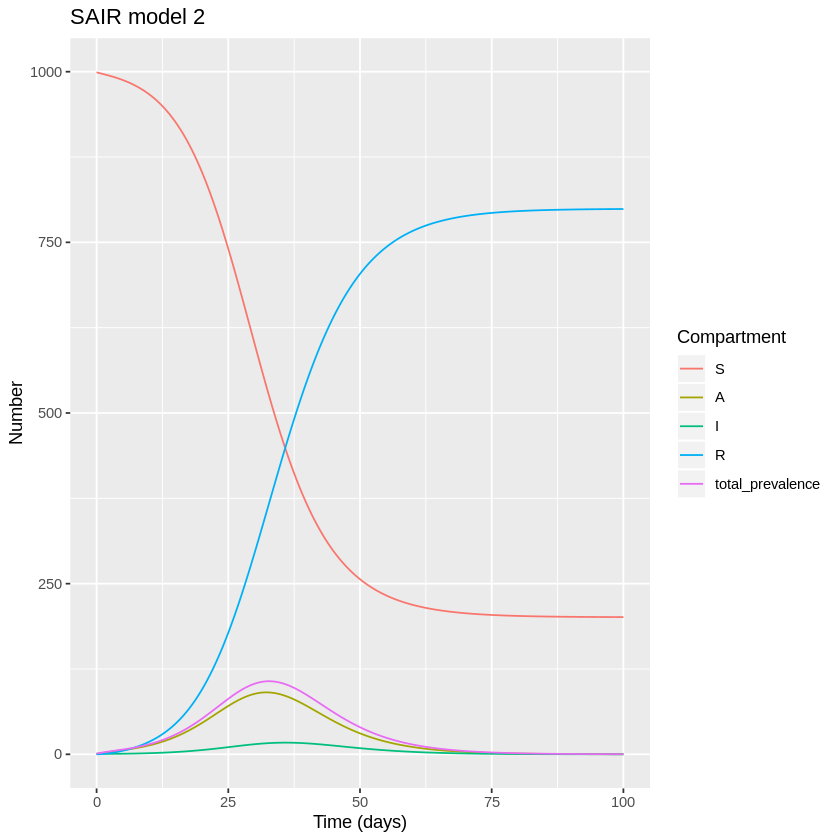

In [6]:
# MODEL INPUTS:

# Initial conditions
sair2_initial_state_values <- c(S = N-1,
                                A = 0,
                                I = 1,           
                                R = 0)           

# Parameter values per day
sair2_parameters <- c(beta1 = 0.2, 
                      beta2 = 2,
                      delta = 1/20,
                      gamma = 1/4)

# TIMESTEPS:

# Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 100, by = 0.1)   # from 0 to 100 days in intervals of 0.1 days

# SIR MODEL FUNCTION: 

# The model function takes as input arguments (in the following order): time, state and parameters
sair2_model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {  # tell R to unpack variable names from the state and parameters inputs    
        
    # Calculating the total population size N (the sum of the number of people in each compartment)
      N <- S+A+I+R
      
    # Defining lambda:
      lambda <- beta1 * A/N + beta2 * I/N
        
    # The differential equations
      dS <- -lambda * S     
      dA <- lambda * S - delta * A - gamma * A
      dI <- delta * A - gamma * I                                        
      dR <- gamma * A + gamma * I                 
      
    return(list(c(dS, dA, dI, dR))) 
    })
  
}

# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output3 <- as.data.frame(ode(y = sair2_initial_state_values, 
                            times = times, 
                            func = sair2_model,
                            parms = sair2_parameters))

# Add a column for total number of infected individuals
output3$total_prevalence <- output3$I+output3$A  # infected individuals = symptomatic + asymptomatic

output3_long <- melt(as.data.frame(output3), id = "time")                  # turn output dataset into long format

# Plot the proportion of people in the S, I and R compartments over time
ggplot(data = output3_long,                                               # specify object containing data to plot
       aes(x = time, y = value, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Number") +                                                       # add label for y axis
  labs(colour = "Compartment",                                           # add legend title  
       title = "SAIR model 2")    

In [7]:
print("Peak prevalence of the epidemic:")
max(output3$total_prevalence) 
print("Peak symptomatic prevalence:")
max(output3$I)
print("Timing of the peak (days):")
output3$time[output3$total_prevalence==max(output3$total_prevalence)]
print("Duration of the epidemic (days):")
max(output3$time[output3$total_prevalence>1])-min(output3$time[output3$total_prevalence>1])

[1] "Peak prevalence of the epidemic:"


[1] 107.0535

[1] "Peak symptomatic prevalence:"


[1] 17.09709

[1] "Timing of the peak (days):"


[1] 32.7

[1] "Duration of the epidemic (days):"


[1] 83.8